# Importing libraries:

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Importing Datasets:

In [34]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [35]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


# Descriptive statistics:

In [36]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [37]:
train.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


* From this we can view some basic statistical details like percentile, mean, std etc.
* As in this data set most of the columns are categorical columns we have only one column which is "Purchase" which is numerical columns.
* From this the mean os the colum is on the higher near to 10000.
* From this we can see number of rows are 550068 and number of columns are 7.
* in sales maximum sales done by a person on a given product is 23961.

In [38]:
train.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

* In this we can see that there are null values in "Product_Category_2 " and "Product_Category_3".
* description of the columns:
* User_Id: user is the unique Identification "Numeric" Code of a person it is unique for every single person ex:1000001,1000002,1000003,etc.


* Product_ID:Product_Id is the unique Identification "Alphanumeric" code for the product each produt have its unique id ex:P00069042,P00248942 etc.


* Gender: As per data only have binary values which is male and female (Male/Female).


* Age: As per the dateset we have a range of age and its a catagorical varible.(like bins) ex:0-17,18-25 ect.


* Occupation: We have diffrent catagories and all are already encoded into labels (0-20).


* City_Category: In this columns we can see that the city are divided into three catagories which are A,B,C.


* Stay_In_Current_City_Years: This column represents from how long that person is living at that city or place we have 5 categories in that columns which are from 0-4+ .Here 0 presents that he just relocated into that city and it have been less that a year. All the peoples who are staying in the city from more than 4 year those all peoples are considered into ine category.


* Marital_Status: Person is married or not categorical column (Single=0,Married=1).


* Product_Category_1,Product_Category_2,Product_Category_3: These columns are also categories columns and it consists the categories of in the columns.


* Purchase: Numerical column and says how much sales is happended on a particular produt bought by a particular person.

# Null-Value Imputation:

In [39]:
train.fillna(0,inplace=True)
test.fillna(0,inplace=True)

* We have various impution Techniques by using inbuild Libraries in the python or we can also use basic impution method which is mean,mode,median.
* But here we are imputing the null values with 0 because  Product_Category_2,Product_Category_3 is dependent Product_Category_1 and so if we imput by mode it will be bias for other catagories.

# Co-relation and multi-corelation check:

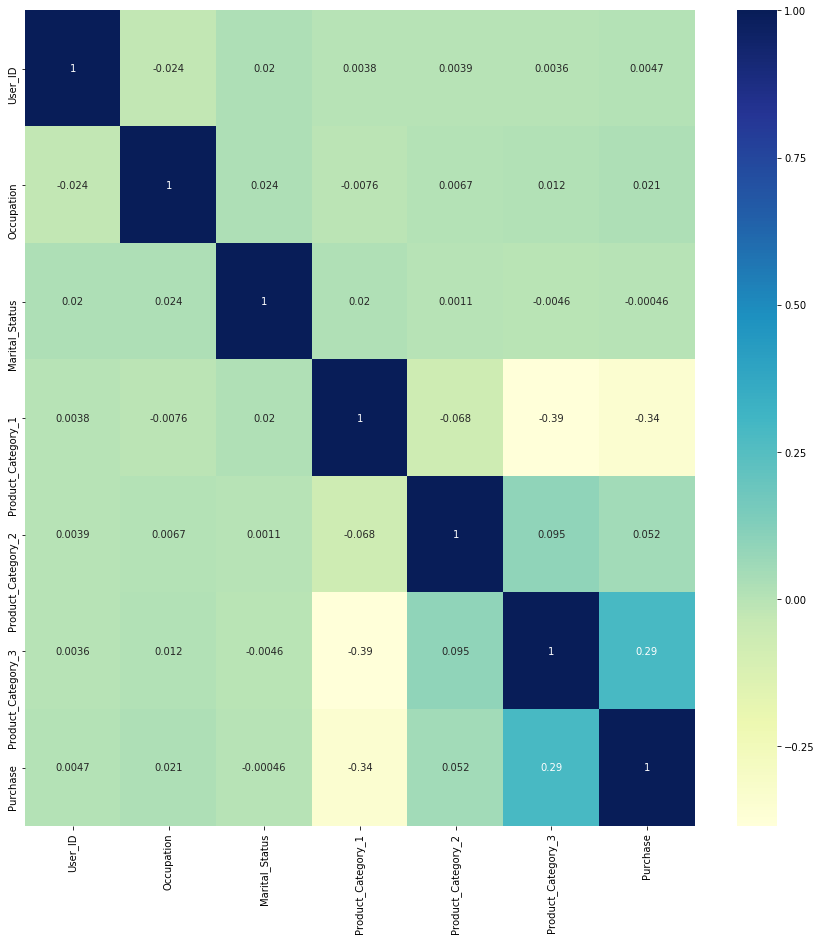

In [40]:
# we can use heat map to check weather there is multi-corelation and  co-relation of inpendent varibles with thr target.
plt.figure(figsize=(15,15))
sns.heatmap(train.corr(),annot=True,cmap="YlGnBu")
plt.show()

* As we can see multicorelation between the features is very less.
* Max co-relation is between Product_category_1 and Product_category_3.

# Data pre-processing:

# Converting categorical columns :

* We can genarally there are many ways to encode the categorical columns like:
* Lable encoding
* One Hot encoding
* But for this data we have lot od columns which have already labled but there are some columns which have to be encoded.
* columns:- Age,Gender,City_Category
* For age column we can create diffrent groups.
* 0-17----Teenage.
* 18-25---young.
* 26-35 and 36-45---median aged people.
* 46-50 and 51-55 and 55+---senior aged peoples.

In [41]:
train['Age']=train['Age'].apply(lambda x: 1 if x=='0-17' else( 2 if x=='18-25' else(3 if x in ('26-35','36-45') else (4 if x in ('46-50','51-55','55+') else x ) )))

In [42]:
# using lambda function we can convert the age categories.

In [43]:
train=pd.get_dummies(data=train,columns=['Gender','City_Category'],drop_first=True)# both the columsn do not have order.

# Data cleaning:

* There is some cleaning which have to done on the "Stay_In_Current_City_Years" as there is a category which is "4+" we have to remove + from the columns as we can considering 4 and 4+ into one catagory. 

In [44]:
train["Stay_In_Current_City_Years"]=train["Stay_In_Current_City_Years"].apply(lambda x: str(x).replace("+","") if "+" in x else x)
train["Stay_In_Current_City_Years"]=train["Stay_In_Current_City_Years"].apply(lambda x: int(x))

In [45]:
train.head()

,User_ID,Product_ID,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Gender_M,City_Category_B,City_Category_C
0,1000001,P00069042,1,10,2,0,3,0.0,0.0,8370,0,0,0
1,1000001,P00248942,1,10,2,0,1,6.0,14.0,15200,0,0,0
2,1000001,P00087842,1,10,2,0,12,0.0,0.0,1422,0,0,0
3,1000001,P00085442,1,10,2,0,12,14.0,0.0,1057,0,0,0
4,1000002,P00285442,4,16,4,0,8,0.0,0.0,7969,1,0,1


* Dropping User_ID and Product_ID from the dateset and there are so many unique elements in them and we can categorized it.

In [47]:
train.drop(columns=['User_ID','Product_ID'],inplace=True)

In [57]:
from sklearn.preprocessing import StandardScaler # we can scale the data by using the liberary from sklearn.
s=StandardScaler()
scaled_data=s.fit_transform(train)
df=pd.DataFrame(scaled_data,columns=train.columns)

# Clustring the data:

# K-mean: With out PCA:

In [58]:
from sklearn.cluster import KMeans
cluster_range = range( 1, 10)
cluster_errors = [] # cluster_errors
cluster_sil_scores = []
for i in cluster_range:
    clusters = KMeans( n_clusters=i, n_init = 5)
    clusters.fit(df)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_ 
    cluster_errors.append( clusters.inertia_ )
df1=pd.DataFrame({"custers_num":cluster_range,"cluster_errors":cluster_errors})

In [61]:
df1

,custers_num,cluster_errors
0,1,6.050748e+06
1,2,5.314795e+06
2,3,4.855745e+06
3,4,4.549778e+06
4,5,4.344351e+06
5,6,4.128801e+06
6,7,4.004235e+06
7,8,3.856358e+06
8,9,3.768640e+06


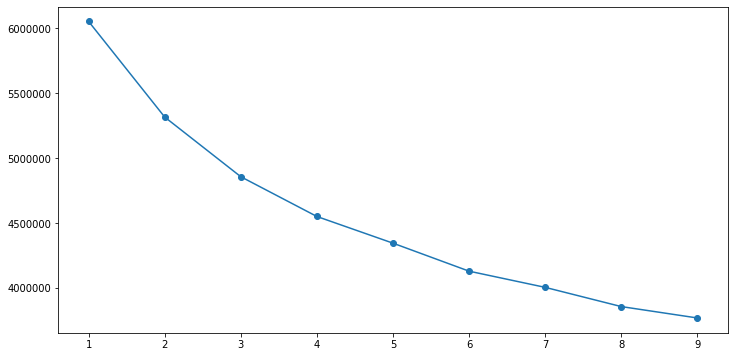

In [59]:
# plotting elbow plot:
plt.figure(figsize=(12,6))
plt.plot( df1['custers_num'],df1['cluster_errors'],marker="o" )
plt.show()

* we are not ble to see any elbow but we can see that the drop in errors is kind of constant after 3 clusters.
* From this we can not interpret that how mant cluster we can use to make a priduct or preduct labels.

# K-mean: With pca:

In [66]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)# considered only two components as most of the information is overlaped on first few features.
pca_data=pca.fit_transform(df) 
pcadata=pd.DataFrame(pca_data,columns=['component1','component2'])

In [67]:
from sklearn.cluster import KMeans
cluster_range = range( 1, 10)
cluster_errors = [] # cluster_errors
cluster_sil_scores = []
for i in cluster_range:
    clusters = KMeans( n_clusters=i, n_init = 5)
    clusters.fit(pcadata)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_ 
    cluster_errors.append( clusters.inertia_ )
df2=pd.DataFrame({"custers_num":cluster_range,"cluster_errors":cluster_errors})
df2

,custers_num,cluster_errors
0,1,1.817899e+06
1,2,1.133282e+06
2,3,6.848156e+05
3,4,4.583770e+05
4,5,3.609536e+05
5,6,3.070289e+05
6,7,2.632322e+05
7,8,2.228667e+05
8,9,1.913940e+05


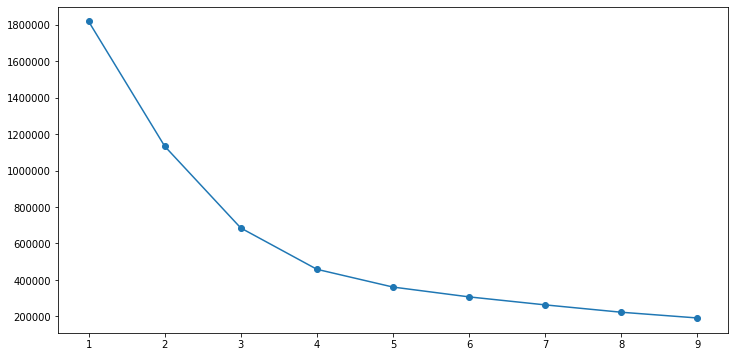

In [68]:
# plotting elbow plot:
plt.figure(figsize=(12,6))
plt.plot( df2['custers_num'],df2['cluster_errors'],marker="o" )
plt.show()

* After pca we can see that our elboy plot is changing and we can see that the albow is forming at 3 or 4.
* From the we can see that at after 3 and 4 the error drop is almost constant.
* We can consider both number of clusters and make a model around it and check by performing supervised-lerning or by loking clusters visually.

# Base Model building

#  Considering 3 clusters:

In [69]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans = kmeans.fit(pcadata)
predicted_target=kmeans.predict(pca_data)
pcadata1=pcadata.copy()
pcadata1['target']=predicted_target

In [72]:
# Plotting the scatter plot to check the clusters:

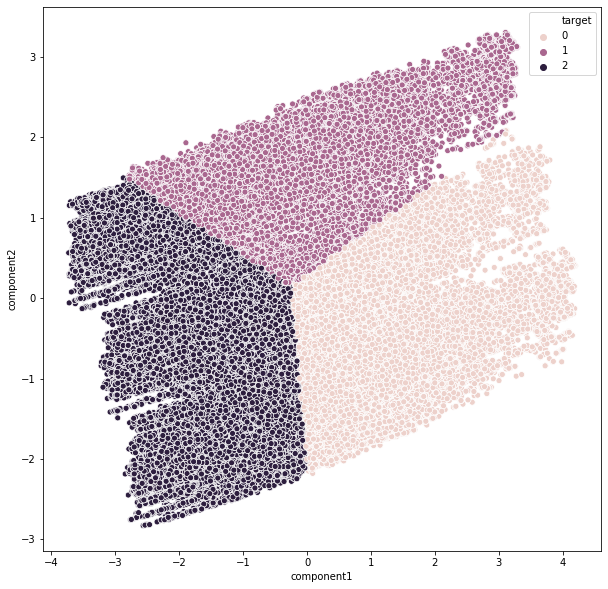

In [87]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=pcadata1,x='component1',y='component2',hue='target')
plt.show()

* From this we acn see data is perfrctly divided into 3 clusters and lables as 0,1,2.
* As performed PCA on  the dataset so can not explain the components .

In [93]:
X=pcadata1.drop(columns='target')
y=pcadata1['target']
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,y,random_state=1,test_size=0.3)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,f1_score
a=LogisticRegression()
b=DecisionTreeClassifier()
c=KNeighborsClassifier()
d=GaussianNB()
list=[a,b,c,d]
jlist=['LogisticRegression accuracy','DecisionTreeClassifier accuracy','KNeighborsClassifier accuracy','GaussianNB accuracy']
for i in range(len(list)):
    model=list[i].fit(xtrain,ytrain)
    pre=model.predict(xtest)
    acc=accuracy_score(ytest,pre)
    f1=f1_score(ytest,pre,average='macro')
    print(jlist[i],acc)

LogisticRegression accuracy 0.9787118003163233
DecisionTreeClassifier accuracy 0.9990546657698112
KNeighborsClassifier accuracy 0.9992970591621673
GaussianNB accuracy 0.9704280061325529


#  Considering 4 clusters:

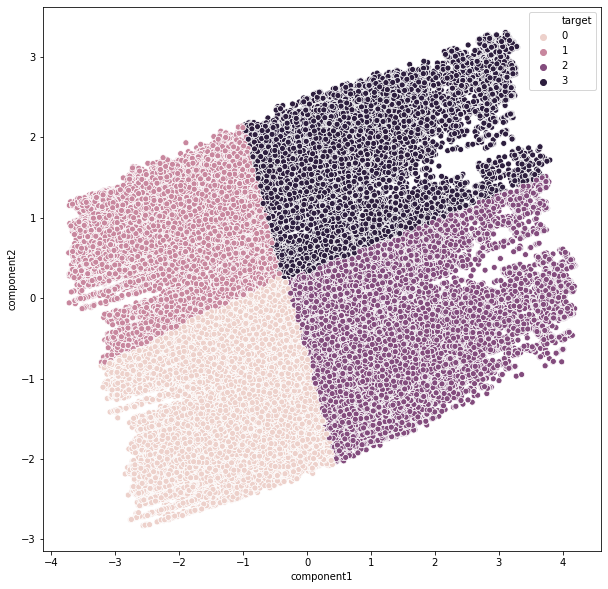

In [90]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans = kmeans.fit(pcadata)
predicted_target=kmeans.predict(pca_data)
pcadata2=pcadata.copy()
pcadata2['target']=predicted_target
plt.figure(figsize=(10,10))
sns.scatterplot(data=pcadata2,x='component1',y='component2',hue='target')
plt.show()

* From this we can see that whole data is clustered into 4 clusters which is labled as 0,1,2,3.

In [92]:
X=pcadata2.drop(columns='target')
y=pcadata2['target']
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,y,random_state=1,test_size=0.3)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
a=LogisticRegression()
b=DecisionTreeClassifier()
c=KNeighborsClassifier()
d=GaussianNB()
list=[a,b,c,d]
jlist=['LogisticRegression accuracy','DecisionTreeClassifier accuracy','KNeighborsClassifier accuracy','GaussianNB accuracy']
for i in range(len(list)):
    model=list[i].fit(xtrain,ytrain)
    pre=model.predict(xtest)
    acc=accuracy_score(ytest,pre)
    f1=f1_score(ytest,pre,average='macro')
    print(jlist[i],acc)

LogisticRegression accuracy 0.94933978099757
DecisionTreeClassifier accuracy 0.9987153150205126
KNeighborsClassifier accuracy 0.9991455632919447
GaussianNB accuracy 0.9586052684203829


* From performing kmean clustering and taking making 3 and 4 clusters we can see that we are able to achive good accuracy on 3 clusters so we can consider 3 clusters.